# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "蔡子暘"
student_id = "B07201025"

---

# Exercise 1 - Newton

### Use the Newton's method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define the function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$ and its derivative $df$.

In [5]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        return np.cosh(x) + np.cos(x) - c
    return f

def df(x):
    return np.sinh(x) - np.sin(x)

Pass the following assertion.

In [6]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1
assert df(0) == 0

### 2. Implement the algorithm

In [19]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    x_n = x_0
    num_iterations = 0
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}
    
    while True:
        f_of_x_n = func(x_n)
        error = abs(f_of_x_n)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
        d_f_of_x_n = d_func(x_n)

        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            if report_history:
                return None, history
            else:
                return None
        
        if num_iterations < max_iterations:
            num_iterations += 1
            x_n = x_n - f_of_x_n / d_f_of_x_n
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n

Test your implementation with the assertion below.

In [20]:
root = newton(
    lambda x: x**2 - x - 1, 
    lambda x: 2*x - 1, 
    1.2, 
    max_iterations=100, 
    tolerance=1e-7, 
    report_history=False
)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

Found solution after 4 iterations.


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

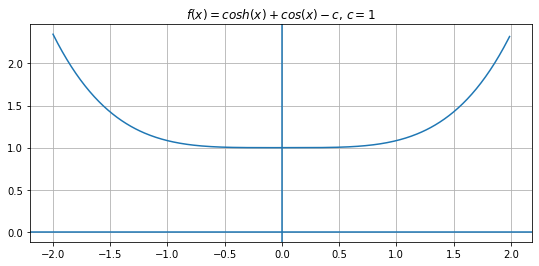

In [21]:
c = 1
f = g(c)

search_range = np.arange(-2, 2, 0.01)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [22]:
root=None

In [23]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

It literally has no root.

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

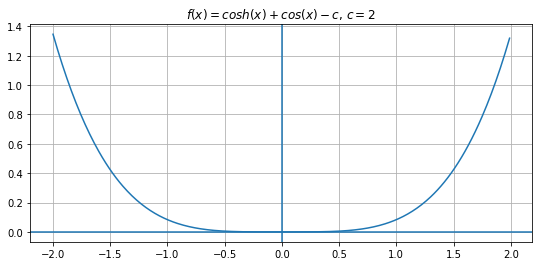

In [24]:
c = 2
f = g(c)
np.arange(-1.0, 1.0, 0.01)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [25]:
root = 0

In [26]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

Since $f(0)=0, f'(x) \geq 0$, equality stands only when $x=0$, and $f''(0)>0$ , so $x=0$ is the only zero.

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

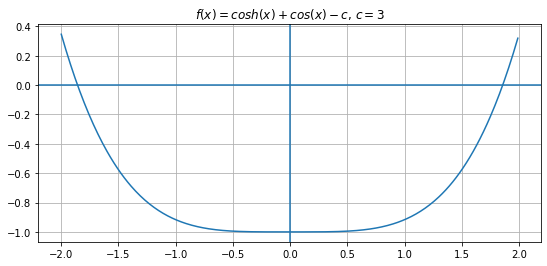

In [27]:
c = 3
f = g(c)
search_range = np.arange(-2.0, 2.0, 0.01)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [28]:
root =-1.8,1.8

In [29]:
print('My estimation of root:', root)


My estimation of root: (-1.8, 1.8)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

Found solution after 3 iterations.
1.8579208291897216


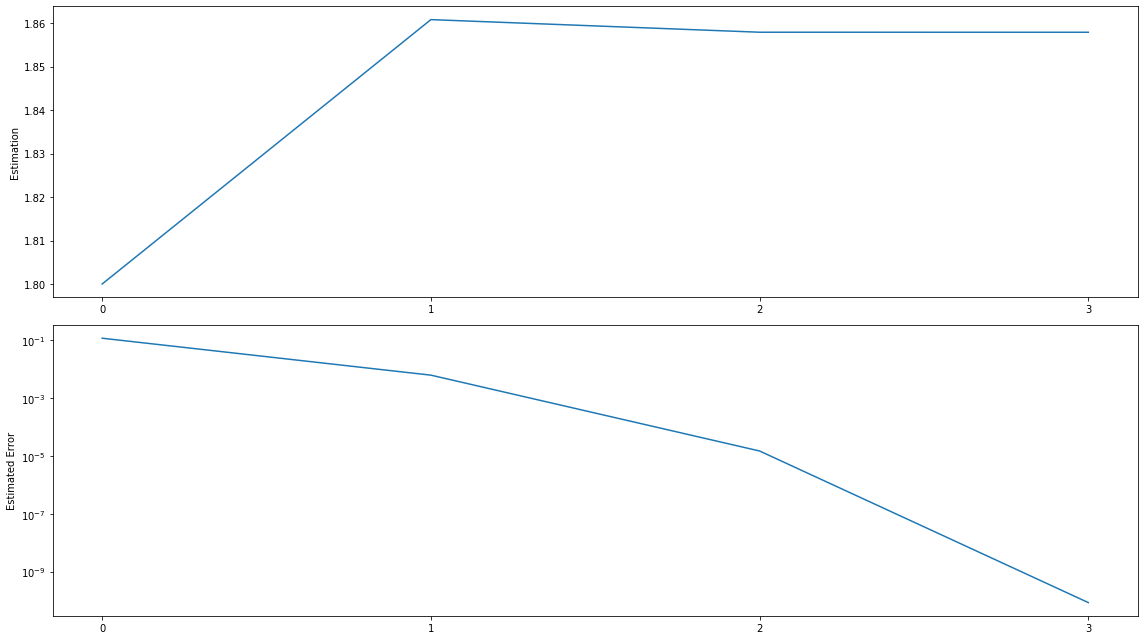

In [31]:
my_initial_point=1.8
solution, history = newton(
    f,
    df,
    my_initial_point,
    tolerance=1e-10,
    max_iterations=100,
    report_history=True
)
print(solution)
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

Found solution after 3 iterations.
-1.8579208291897216


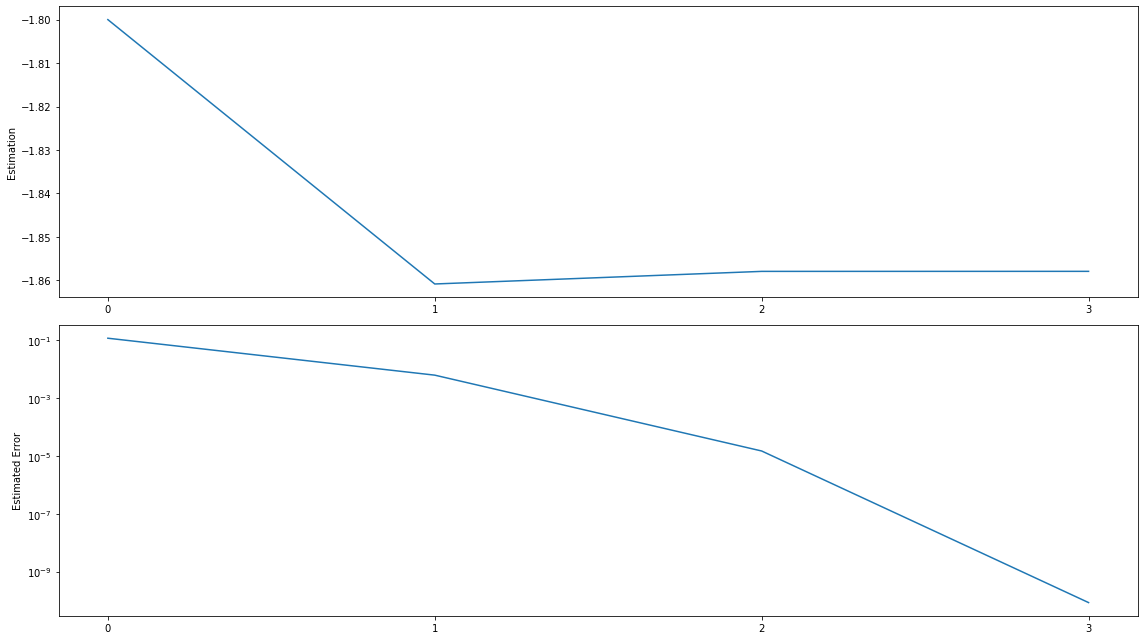

In [33]:
my_initial_point=-1.8
solution, history = newton(
    f,
    d_f,
    my_initial_point,
    tolerance=1e-10,
    max_iterations=100,
    report_history=True
)
print(solution)
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2= axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

Yes, all the results agree with the theoretical analysis.